In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# 1. Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [3]:
# 2. Split data into "training" and "production" sets
# We'll use 70% for training and 30% to simulate data the model sees in production
X_train, X_prod, y_train, y_prod = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Production data shape (original): {X_prod.shape}\n")

Training data shape: (105, 4)
Production data shape (original): (45, 4)



In [4]:
# 3. Simulate Data Drift (Covariate Shift) in the production data
# Let's simulate a shift in 'sepal length (cm)' and 'petal width (cm)'
# by adding a small constant or noise.
# We'll create a *copy* to avoid modifying the original production data.
X_prod_drifted = X_prod.copy()

In [5]:
# Simulate a positive shift in sepal length (e.g., sensors reading slightly higher)
X_prod_drifted['sepal length (cm)'] = X_prod_drifted['sepal length (cm)'] + 0.8 # Adding 0.8 cm

# Simulate a positive shift in petal width (e.g., measurement tool calibration change)
X_prod_drifted['petal width (cm)'] = X_prod_drifted['petal width (cm)'] + 0.3 # Adding 0.3 cm

print("Simulated drift in 'sepal length (cm)' and 'petal width (cm)' in X_prod_drifted\n")

Simulated drift in 'sepal length (cm)' and 'petal width (cm)' in X_prod_drifted



In [6]:
# 4. Train a Machine Learning Model on the training data
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

print("Model trained on X_train, y_train")


Model trained on X_train, y_train


In [7]:
# 5. Evaluate Model Performance

# Evaluate on the original production data (no drift) - Expected good performance
y_pred_original = model.predict(X_prod)
accuracy_original = accuracy_score(y_prod, y_pred_original)
print(f"Accuracy on original production data: {accuracy_original:.4f}")

Accuracy on original production data: 0.9333


In [8]:
# Evaluate on the drifted production data - Expected performance drop
y_pred_drifted = model.predict(X_prod_drifted)
accuracy_drifted = accuracy_score(y_prod, y_pred_drifted) # Note: we compare to original y_prod
print(f"Accuracy on drifted production data: {accuracy_drifted:.4f}")

print(f"\nAccuracy dropped by: {accuracy_original - accuracy_drifted:.4f}")

Accuracy on drifted production data: 0.9556

Accuracy dropped by: -0.0222



Visualizing the drift in features:


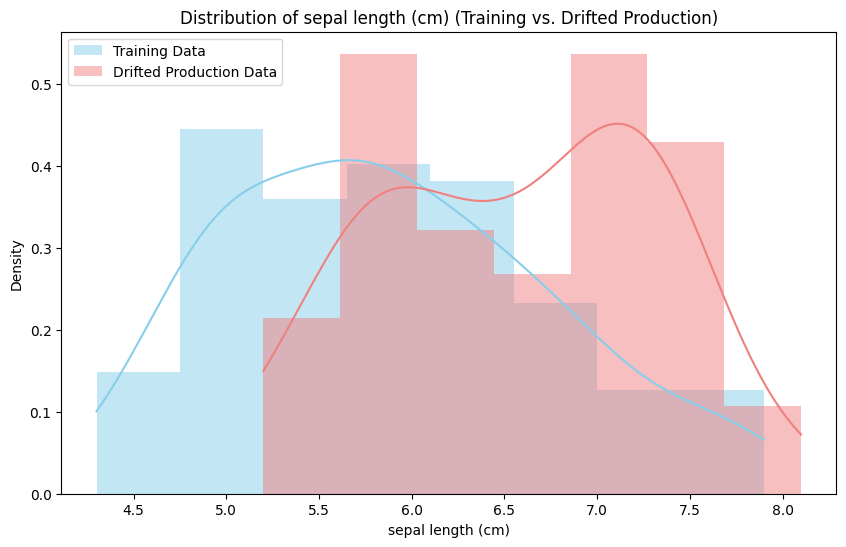

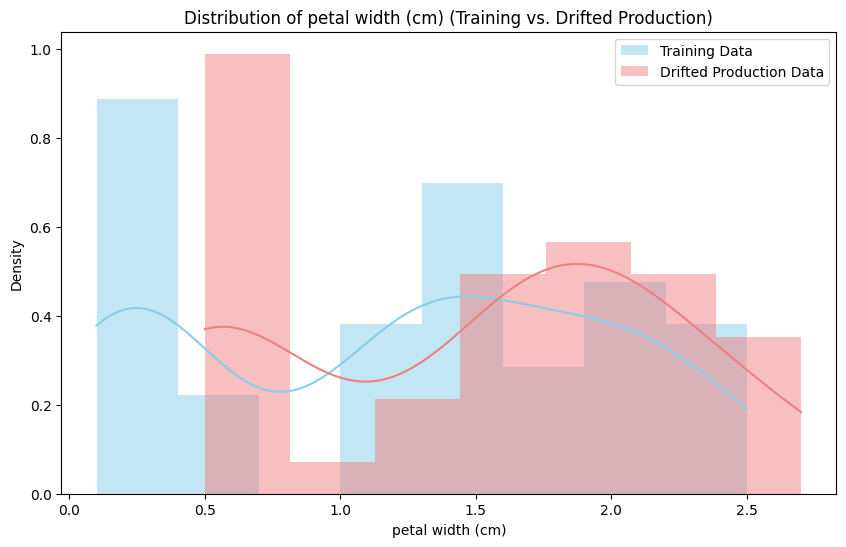

In [9]:
# 6. Visualize the Data Drift
print("\nVisualizing the drift in features:")

features_to_visualize = ['sepal length (cm)', 'petal width (cm)']

for feature in features_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train[feature], color="skyblue", label="Training Data", kde=True, stat="density", linewidth=0)
    sns.histplot(X_prod_drifted[feature], color="lightcoral", label="Drifted Production Data", kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution of {feature} (Training vs. Drifted Production)')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

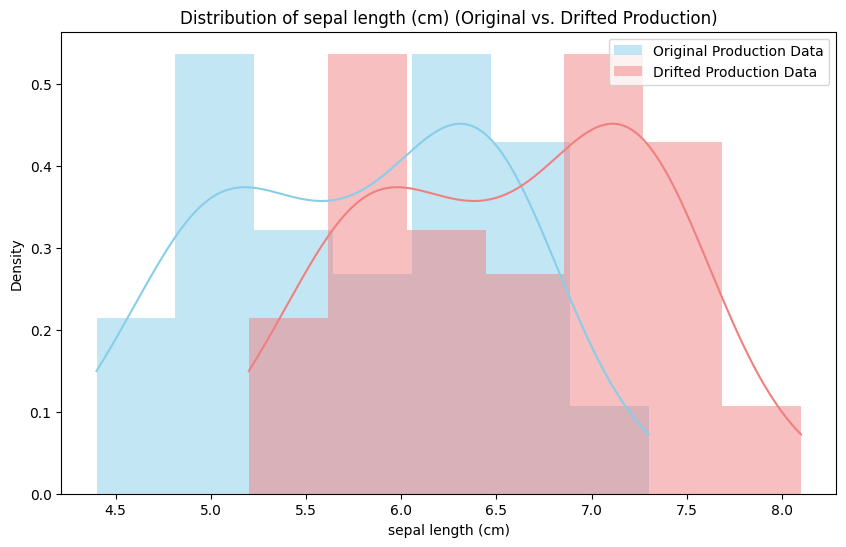

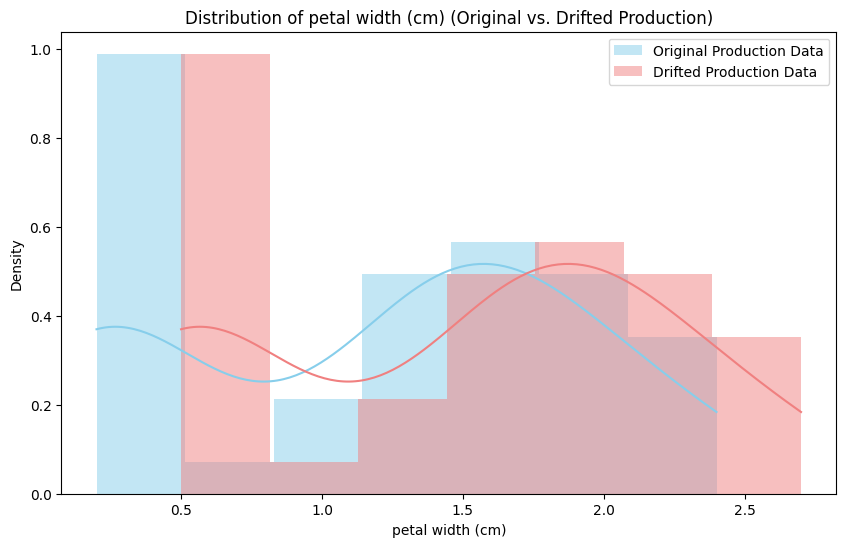

In [10]:

# To visualize the original production data vs drifted production data
# to see the shift clearly without the training data as reference
for feature in features_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_prod[feature], color="skyblue", label="Original Production Data", kde=True, stat="density", linewidth=0)
    sns.histplot(X_prod_drifted[feature], color="lightcoral", label="Drifted Production Data", kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution of {feature} (Original vs. Drifted Production)')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()